In [1]:
import pandas as pd

# File paths
files = {
    "Ionosphere": "C:/Users/91959/Desktop/CODE/Robust-Logistic-Regression-with-Shift-Parameter-Estimation/Experiment_Results/Ionosphere_Results.csv",
    "Parkinsons": "C:/Users/91959/Desktop/CODE/Robust-Logistic-Regression-with-Shift-Parameter-Estimation/Experiment_Results/Parkinsons_Results.csv",
    "Spambase": "C:/Users/91959/Desktop/CODE/Robust-Logistic-Regression-with-Shift-Parameter-Estimation/Experiment_Results/Spambase_Results.csv",
}

# Read and inspect the first few rows of each file
data_samples = {name: pd.read_csv(path).head() for name, path in files.items()}
data_samples


{'Ionosphere':   Noise Level            L1 Lasso         Elastic Net
 0   10% Noise  0.1404 ± 0.0043 SE  0.1360 ± 0.0043 SE
 1   20% Noise  0.1619 ± 0.0055 SE  0.1545 ± 0.0050 SE,
 'Parkinsons':   Noise Level            L1 Lasso         Elastic Net
 0   10% Noise  0.3149 ± 0.0101 SE  0.2980 ± 0.0087 SE
 1   20% Noise  0.3339 ± 0.0075 SE  0.3159 ± 0.0088 SE,
 'Spambase':   Noise Level            L1 Lasso         Elastic Net
 0   10% Noise  0.0884 ± 0.0011 SE  0.0876 ± 0.0011 SE
 1   20% Noise  0.0903 ± 0.0009 SE  0.0884 ± 0.0011 SE}

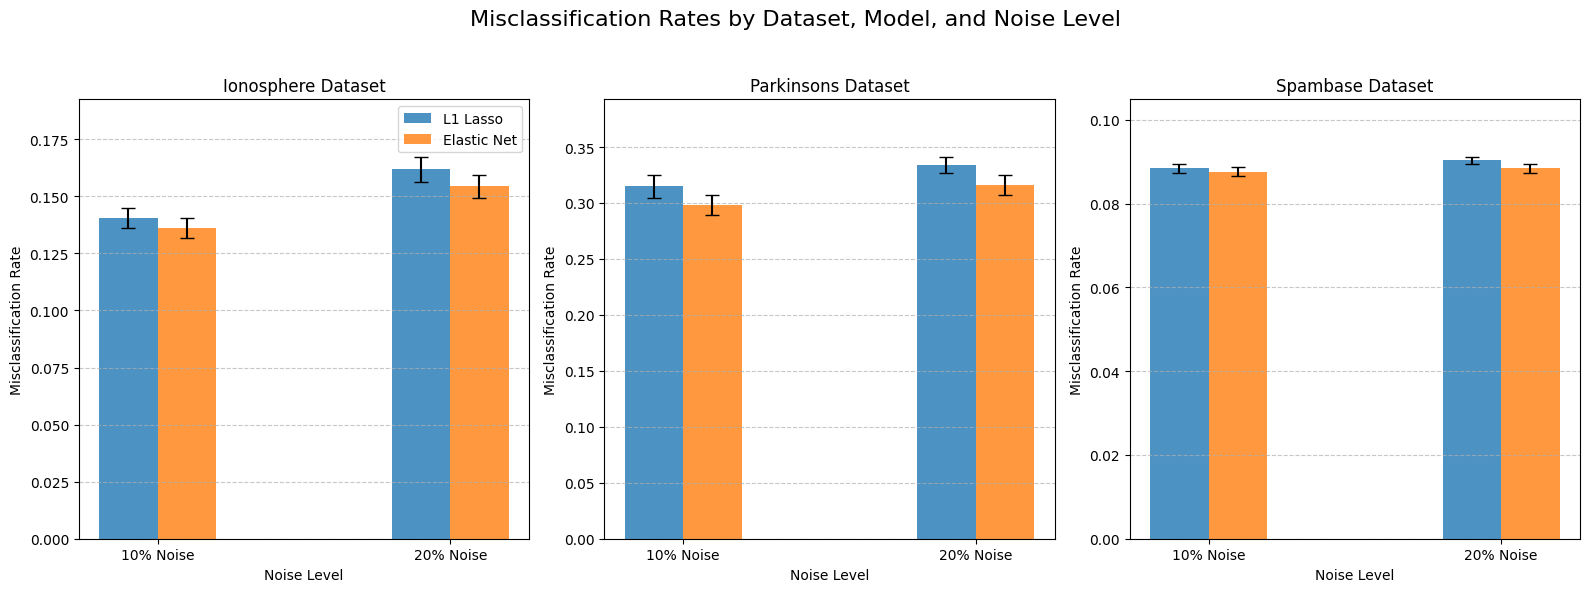

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
datasets = ['Ionosphere', 'Parkinsons', 'Spambase']
models = ['L1 Lasso', 'Elastic Net']
noise_levels = ['10% Noise', '20% Noise']

# Data from the provided CSVs
data = {
    'Ionosphere': {
        '10% Noise': {'L1 Lasso': 0.1404, 'Elastic Net': 0.1360},
        '20% Noise': {'L1 Lasso': 0.1619, 'Elastic Net': 0.1545}
    },
    'Parkinsons': {
        '10% Noise': {'L1 Lasso': 0.3149, 'Elastic Net': 0.2980},
        '20% Noise': {'L1 Lasso': 0.3339, 'Elastic Net': 0.3159}
    },
    'Spambase': {
        '10% Noise': {'L1 Lasso': 0.0884, 'Elastic Net': 0.0876},
        '20% Noise': {'L1 Lasso': 0.0903, 'Elastic Net': 0.0884}
    }
}

# Error data (Standard Error)
error_data = {
    'Ionosphere': {
        '10% Noise': {'L1 Lasso': 0.0043, 'Elastic Net': 0.0043},
        '20% Noise': {'L1 Lasso': 0.0055, 'Elastic Net': 0.0050}
    },
    'Parkinsons': {
        '10% Noise': {'L1 Lasso': 0.0101, 'Elastic Net': 0.0087},
        '20% Noise': {'L1 Lasso': 0.0075, 'Elastic Net': 0.0088}
    },
    'Spambase': {
        '10% Noise': {'L1 Lasso': 0.0011, 'Elastic Net': 0.0011},
        '20% Noise': {'L1 Lasso': 0.0009, 'Elastic Net': 0.0011}
    }
}

# Set up the figure with appropriate size
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Misclassification Rates by Dataset, Model, and Noise Level', fontsize=16)

# Set width of bars
bar_width = 0.2
index = np.arange(2)  # For two noise levels

# Colors for the models
colors = {'L1 Lasso': '#1f77b4', 'Elastic Net': '#ff7f0e'}

# Iterate through datasets and create subplots
for i, dataset in enumerate(datasets):
    ax = axs[i]
    ax.set_title(f'{dataset} Dataset')
    ax.set_ylabel('Misclassification Rate')
    ax.set_xlabel('Noise Level')
    ax.set_xticks(index + bar_width/2)
    ax.set_xticklabels(noise_levels)
    
    # Plot bars for each model
    for j, model in enumerate(models):
        values = [data[dataset][noise][model] for noise in noise_levels]
        errors = [error_data[dataset][noise][model] for noise in noise_levels]
        
        position = index + j * bar_width
        bars = ax.bar(position, values, bar_width, 
                      label=model, 
                      color=colors[model],
                      alpha=0.8)
        
        # Add error bars
        ax.errorbar(position, values, yerr=errors, fmt='none', color='black', capsize=5)
    
    # Set y-axis limits based on the data in each dataset
    max_val = max([data[dataset][noise][model] + error_data[dataset][noise][model] 
                  for noise in noise_levels for model in models])
    ax.set_ylim(0, max_val * 1.15)  # Add 15% padding on top
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Only add legend to the first subplot to avoid redundancy
    if i == 0:
        ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the title
plt.show()

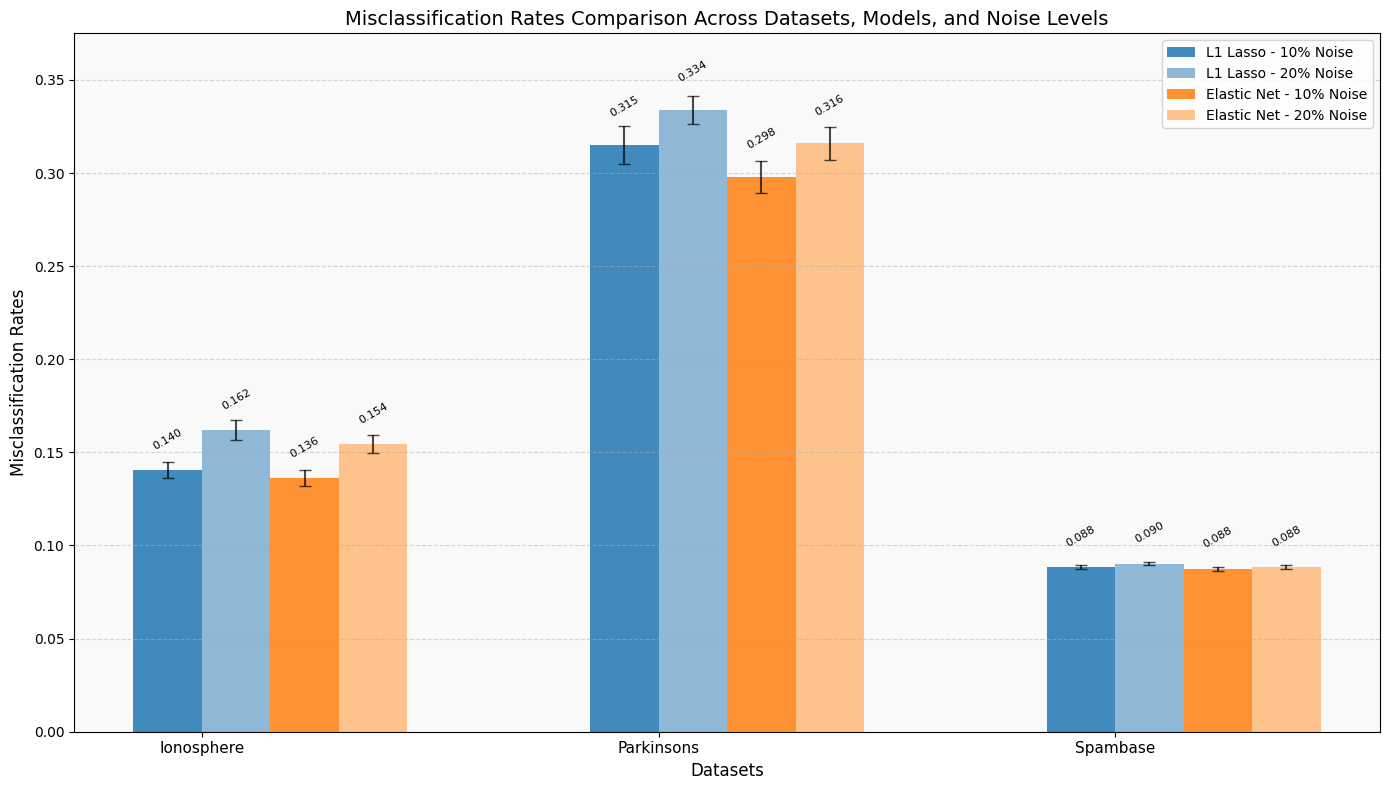

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
datasets = ['Ionosphere', 'Parkinsons', 'Spambase']
models = ['L1 Lasso', 'Elastic Net']
noise_levels = ['10% Noise', '20% Noise']

# Data from the provided CSVs
data = {
    'Ionosphere': {
        '10% Noise': {'L1 Lasso': 0.1404, 'Elastic Net': 0.1360},
        '20% Noise': {'L1 Lasso': 0.1619, 'Elastic Net': 0.1545}
    },
    'Parkinsons': {
        '10% Noise': {'L1 Lasso': 0.3149, 'Elastic Net': 0.2980},
        '20% Noise': {'L1 Lasso': 0.3339, 'Elastic Net': 0.3159}
    },
    'Spambase': {
        '10% Noise': {'L1 Lasso': 0.0884, 'Elastic Net': 0.0876},
        '20% Noise': {'L1 Lasso': 0.0903, 'Elastic Net': 0.0884}
    }
}

# Error data (Standard Error)
error_data = {
    'Ionosphere': {
        '10% Noise': {'L1 Lasso': 0.0043, 'Elastic Net': 0.0043},
        '20% Noise': {'L1 Lasso': 0.0055, 'Elastic Net': 0.0050}
    },
    'Parkinsons': {
        '10% Noise': {'L1 Lasso': 0.0101, 'Elastic Net': 0.0087},
        '20% Noise': {'L1 Lasso': 0.0075, 'Elastic Net': 0.0088}
    },
    'Spambase': {
        '10% Noise': {'L1 Lasso': 0.0011, 'Elastic Net': 0.0011},
        '20% Noise': {'L1 Lasso': 0.0009, 'Elastic Net': 0.0011}
    }
}

# Set up the figure with appropriate size
plt.figure(figsize=(14, 8))

# Calculate positions for the bars
bar_width = 0.15
n_datasets = len(datasets)
n_models = len(models)
n_noise = len(noise_levels)

# Generate x positions for grouped bars
indices = np.arange(n_datasets)

# Color scheme - two colors for models with different shades for noise levels
colors = {
    'L1 Lasso': {'10% Noise': '#1f77b4', '20% Noise': '#7dacd0'},  # Blue shades
    'Elastic Net': {'10% Noise': '#ff7f0e', '20% Noise': '#ffb97a'}  # Orange shades
}

# Plot bars
for i, model in enumerate(models):
    for j, noise in enumerate(noise_levels):
        # Calculate position for this group of bars
        pos = indices - bar_width*(n_noise/2) + bar_width/2 + (i*n_noise + j)*bar_width
        
        # Get values and errors for this model and noise level across datasets
        values = [data[dataset][noise][model] for dataset in datasets]
        errors = [error_data[dataset][noise][model] for dataset in datasets]
        
        plt.bar(pos, values, bar_width, 
                label=f'{model} - {noise}',
                color=colors[model][noise],
                alpha=0.85)
        
        # Add error bars
        plt.errorbar(pos, values, yerr=errors, fmt='none', color='black', capsize=4, alpha=0.7)

# Add labels, title and legend
plt.xlabel('Datasets', fontsize=12)
plt.ylabel('Misclassification Rates', fontsize=12)
plt.title('Misclassification Rates Comparison Across Datasets, Models, and Noise Levels', fontsize=14)
plt.xticks(indices, datasets, fontsize=11)
plt.legend(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Ensure the y-axis starts from 0 and has enough room for the Parkinsons labels
plt.ylim(0, 0.375)  # Increased upper limit to make room for Parkinsons labels

# Add value labels on top of each bar with special handling for Parkinsons
for i, model in enumerate(models):
    for j, noise in enumerate(noise_levels):
        pos = indices - bar_width*(n_noise/2) + bar_width/2 + (i*n_noise + j)*bar_width
        values = [data[dataset][noise][model] for dataset in datasets]
        
        for k, (x, y) in enumerate(zip(pos, values)):
            # Special handling for Parkinsons dataset (index 1)
            if datasets[k] == 'Parkinsons':
                # Add more vertical space for Parkinsons labels
                plt.text(x, y + 0.014, f'{y:.3f}', ha='center', va='bottom', fontsize=8, rotation=30)
            else:
                # Regular spacing for other datasets
                plt.text(x, y + 0.01, f'{y:.3f}', ha='center', va='bottom', fontsize=8, rotation=30)

# Add a subtle background color for better aesthetics
plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()